## Employee salary negotiations while hiring Predictive Statistics-Linear Regression Analysis.
## Company wants to predict possible salary for offer letter generation
* Target Variable is 'MonthlyIncome'

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_excel(r'C:\Users\Ankit Dsouza\Desktop\tanushree notes\Talent analytics Case study file\Linear Regression\hr_dataset.xlsx')

In [3]:
df.head()

Age  Gender                JobRole EducationField  NumCompaniesWorked  \
0   23  Female        Sales Executive  Life Sciences                   8   
1   51    Male     Research Scientist  Life Sciences                   1   
2   34    Male  Laboratory Technician          Other                   6   
3   20  Female     Research Scientist  Life Sciences                   1   
4   56    Male  Laboratory Technician        Medical                   9   

   YearsOfExperience  Communication  Certifications  MonthlyIncome  
0                  5              0               1         5993.0  
1                  7              0               1         5130.0  
2                  0              0               0         2090.0  
3                  0              0               0         2909.0  
4                  2              0               0         3468.0

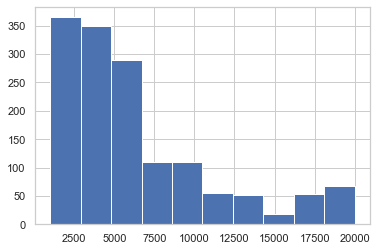

In [4]:
df.MonthlyIncome.hist()

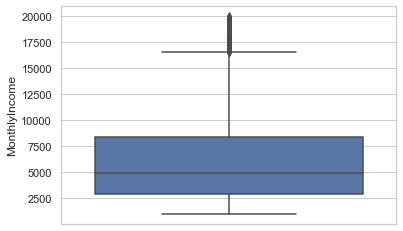

In [5]:
sns.boxplot(y='MonthlyIncome',data=df)

In [6]:
df['Scaling_MI']=df.MonthlyIncome/1000

In [7]:
df['LN_MI2']=np.log(df.Scaling_MI)

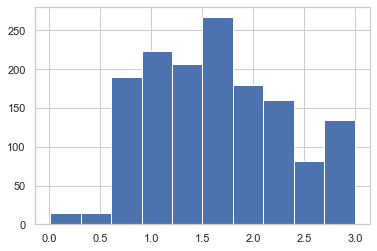

In [8]:
df.LN_MI2.hist()

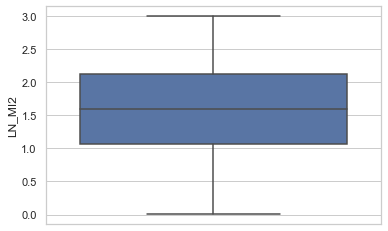

In [9]:
sns.boxplot(y='LN_MI2',data=df)

In [10]:
df.head()

Age  Gender                JobRole EducationField  NumCompaniesWorked  \
0   23  Female        Sales Executive  Life Sciences                   8   
1   51    Male     Research Scientist  Life Sciences                   1   
2   34    Male  Laboratory Technician          Other                   6   
3   20  Female     Research Scientist  Life Sciences                   1   
4   56    Male  Laboratory Technician        Medical                   9   

   YearsOfExperience  Communication  Certifications  MonthlyIncome  \
0                  5              0               1         5993.0   
1                  7              0               1         5130.0   
2                  0              0               0         2090.0   
3                  0              0               0         2909.0   
4                  2              0               0         3468.0   

   Scaling_MI    LN_MI2  
0       5.993  1.790592  
1       5.130  1.635106  
2       2.090  0.737164  
3       2.909  1.067809  
4       3.468  1.243578

In [11]:
df.shape

(1470, 11)

In [12]:
df.describe()

Age  NumCompaniesWorked  YearsOfExperience  Communication  \
count  1470.000000         1470.000000        1470.000000    1470.000000   
mean     38.433333            2.693197           4.095238       0.291156   
std      11.451647            2.498009           3.511206       0.454450   
min      19.000000            0.000000           0.000000       0.000000   
25%      28.000000            1.000000           2.000000       0.000000   
50%      38.000000            2.000000           3.000000       0.000000   
75%      49.000000            4.000000           7.000000       1.000000   
max      58.000000            9.000000          17.000000       1.000000   

       Certifications  MonthlyIncome   Scaling_MI       LN_MI2  
count     1470.000000    1470.000000  1470.000000  1470.000000  
mean         0.630612    6502.931293     6.502931     1.644760  
std          0.482803    4707.956783     4.707957     0.664450  
min          0.000000    1009.000000     1.009000     0.008960  
25%          0.000000    2911.000000     2.911000     1.068497  
50%          1.000000    4919.000000     4.919000     1.593103  
75%          1.000000    8379.000000     8.379000     2.125729  
max          1.000000   19999.000000    19.999000     2.995682

In [13]:
df.isnull().sum(axis = 0)

Age                   0
Gender                0
JobRole               0
EducationField        0
NumCompaniesWorked    0
YearsOfExperience     0
Communication         0
Certifications        0
MonthlyIncome         0
Scaling_MI            0
LN_MI2                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
Age                   1470 non-null int64
Gender                1470 non-null object
JobRole               1470 non-null object
EducationField        1470 non-null object
NumCompaniesWorked    1470 non-null int64
YearsOfExperience     1470 non-null int64
Communication         1470 non-null int64
Certifications        1470 non-null int64
MonthlyIncome         1470 non-null float64
Scaling_MI            1470 non-null float64
LN_MI2                1470 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 126.5+ KB


## Data Preprocessing
* Assign Lables to categorical data

In [15]:
df.Gender=(LabelEncoder().fit_transform(df.Gender))
df.JobRole=(LabelEncoder().fit_transform(df.JobRole))
df.EducationField=(LabelEncoder().fit_transform(df.EducationField))

## Exploratory Data Analysis

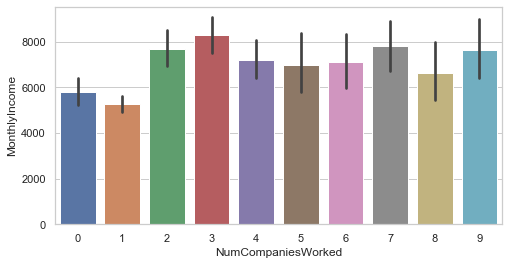

In [16]:
plt.figure(figsize = (8,4))
sns.barplot(x='NumCompaniesWorked', y='MonthlyIncome', data=df)

* Has we can see the employee with 0 and 1 'NumCompaniesWorked' has a low 'MonthlyIncome', rest has a higher 'MonthlyIncome'.

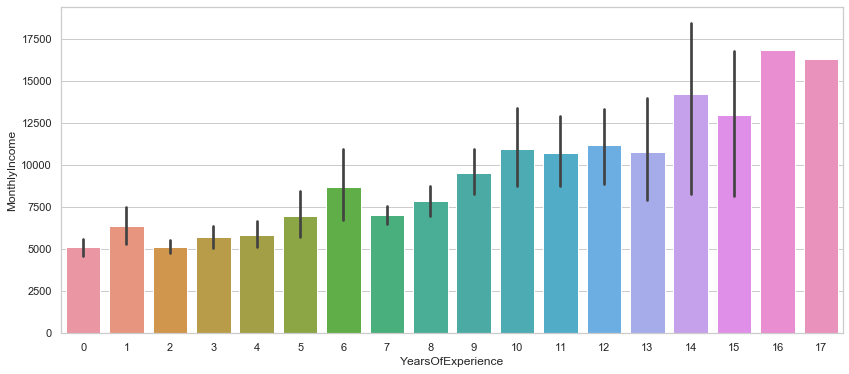

In [17]:
plt.figure(figsize = (14,6))
sns.barplot(x='YearsOfExperience', y='MonthlyIncome', data=df)

* Here we can notice a trend as 'totalworkingyears' increase 'monthlyincome' increases. It is positive related.

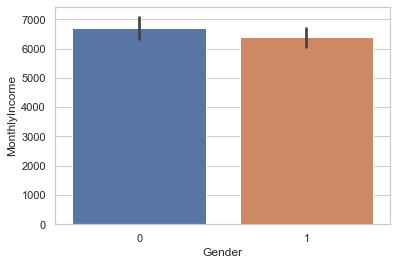

In [18]:
sns.barplot(x='Gender', y='MonthlyIncome', data=df)

* There is no difference in salary of Male and Female. 'MonthlyIncome' is not depend on 'Gender'.

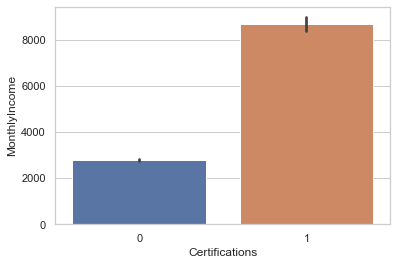

In [19]:
sns.barplot(x='Certifications', y='MonthlyIncome', data=df)
# 0 represent No Professional Certifications and 1 represent they did Professional Certifications.

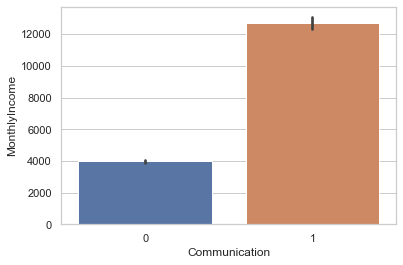

In [20]:
sns.barplot(x='Communication', y='MonthlyIncome', data=df)
# 0 represent they are not good in Communication and 1 represent they are good in Communication

In [21]:
df.head()

Age  Gender  JobRole  EducationField  NumCompaniesWorked  \
0   23       0        7               1                   8   
1   51       1        6               1                   1   
2   34       1        2               4                   6   
3   20       0        6               1                   1   
4   56       1        2               3                   9   

   YearsOfExperience  Communication  Certifications  MonthlyIncome  \
0                  5              0               1         5993.0   
1                  7              0               1         5130.0   
2                  0              0               0         2090.0   
3                  0              0               0         2909.0   
4                  2              0               0         3468.0   

   Scaling_MI    LN_MI2  
0       5.993  1.790592  
1       5.130  1.635106  
2       2.090  0.737164  
3       2.909  1.067809  
4       3.468  1.243578

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
Age                   1470 non-null int64
Gender                1470 non-null int32
JobRole               1470 non-null int32
EducationField        1470 non-null int32
NumCompaniesWorked    1470 non-null int64
YearsOfExperience     1470 non-null int64
Communication         1470 non-null int64
Certifications        1470 non-null int64
MonthlyIncome         1470 non-null float64
Scaling_MI            1470 non-null float64
LN_MI2                1470 non-null float64
dtypes: float64(3), int32(3), int64(5)
memory usage: 109.2 KB


## Removing Outlier

## checking the Outlier in dataset

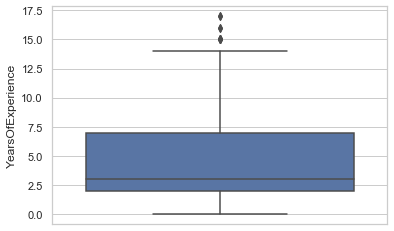

In [23]:
sns.boxplot(y='YearsOfExperience',data=df)

In [24]:
q1=df['YearsOfExperience'].quantile(0.25)
q3=df['YearsOfExperience'].quantile(0.75)
iqr=q3-q1 #Inter Quartile Range
low  = q1-1.5*iqr
high = q3+1.5*iqr
low,high

(-5.5, 14.5)

In [25]:
# np.where statement is used instead of "if-else"
df['YearsOfExperience']=np.where(df['YearsOfExperience'] > high,high,df['YearsOfExperience']) #upper limit
df['YearsOfExperience']=np.where(df['YearsOfExperience'] < low,low,df['YearsOfExperience']) #lower limit

In [26]:
df.describe()

Age       Gender      JobRole  EducationField  \
count  1470.000000  1470.000000  1470.000000     1470.000000   
mean     38.433333     0.600000     4.458503        2.247619   
std      11.451647     0.490065     2.461821        1.331369   
min      19.000000     0.000000     0.000000        0.000000   
25%      28.000000     0.000000     2.000000        1.000000   
50%      38.000000     1.000000     5.000000        2.000000   
75%      49.000000     1.000000     7.000000        3.000000   
max      58.000000     1.000000     8.000000        5.000000   

       NumCompaniesWorked  YearsOfExperience  Communication  Certifications  \
count         1470.000000        1470.000000    1470.000000     1470.000000   
mean             2.693197           4.087415       0.291156        0.630612   
std              2.498009           3.486092       0.454450        0.482803   
min              0.000000           0.000000       0.000000        0.000000   
25%              1.000000           2.000000       0.000000        0.000000   
50%              2.000000           3.000000       0.000000        1.000000   
75%              4.000000           7.000000       1.000000        1.000000   
max              9.000000          14.500000       1.000000        1.000000   

       MonthlyIncome   Scaling_MI       LN_MI2  
count    1470.000000  1470.000000  1470.000000  
mean     6502.931293     6.502931     1.644760  
std      4707.956783     4.707957     0.664450  
min      1009.000000     1.009000     0.008960  
25%      2911.000000     2.911000     1.068497  
50%      4919.000000     4.919000     1.593103  
75%      8379.000000     8.379000     2.125729  
max     19999.000000    19.999000     2.995682

## Data Partition

In [27]:
df_new=df.copy()

In [28]:
df_new.drop(["MonthlyIncome", "Scaling_MI"], axis = 1, inplace = True) 

In [29]:
df_new.columns

Index(['Age', 'Gender', 'JobRole', 'EducationField', 'NumCompaniesWorked',
       'YearsOfExperience', 'Communication', 'Certifications', 'LN_MI2'],
      dtype='object')

In [30]:
x = df_new.drop('LN_MI2',axis=1)
y = df_new[['LN_MI2']]
# split x and y into x_
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=100)

## Model Building

### Correlation Matrix

In [31]:
df_1 = pd.concat([y_train,x_train], axis=1)

LN_MI2       Age    Gender   JobRole  EducationField  \
LN_MI2              1.000000 -0.002344 -0.061790 -0.079919       -0.047887   
Age                -0.002344  1.000000  0.027640  0.078237        0.005658   
Gender             -0.061790  0.027640  1.000000 -0.037905       -0.017206   
JobRole            -0.079919  0.078237 -0.037905  1.000000        0.032034   
EducationField     -0.047887  0.005658 -0.017206  0.032034        1.000000   
NumCompaniesWorked  0.151697 -0.019772 -0.059285 -0.048059       -0.012484   
YearsOfExperience   0.387587  0.021083 -0.017493 -0.027229       -0.001283   
Communication       0.816677 -0.006636 -0.040979 -0.056377       -0.034168   
Certifications      0.756456  0.009536 -0.062009 -0.028588       -0.065564   

                    NumCompaniesWorked  YearsOfExperience  Communication  \
LN_MI2                        0.151697           0.387587       0.816677   
Age                          -0.019772           0.021083      -0.006636   
Gender                       -0.059285          -0.017493      -0.040979   
JobRole                      -0.048059          -0.027229      -0.056377   
EducationField               -0.012484          -0.001283      -0.034168   
NumCompaniesWorked            1.000000          -0.104379       0.088197   
YearsOfExperience            -0.104379           1.000000       0.289310   
Communication                 0.088197           0.289310       1.000000   
Certifications                0.130801           0.365044       0.495777   

                    Certifications  
LN_MI2                    0.756456  
Age                       0.009536  
Gender                   -0.062009  
JobRole                  -0.028588  
EducationField           -0.065564  
NumCompaniesWorked        0.130801  
YearsOfExperience         0.365044  
Communication             0.495777  
Certifications            1.000000

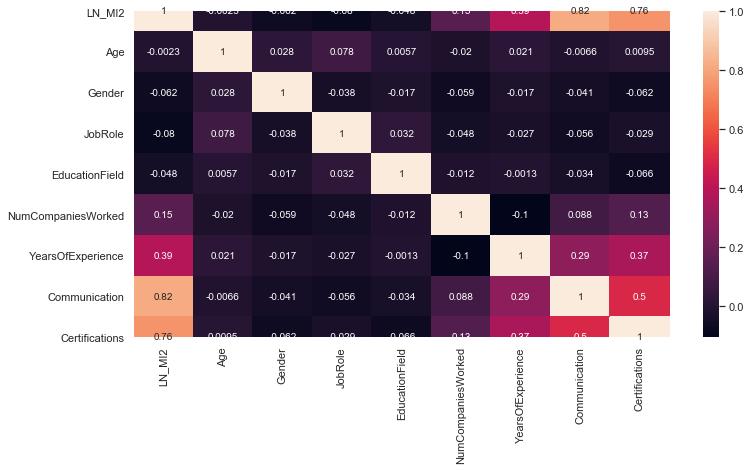

In [32]:
# calculate the correlation matrix
corr = df_1.corr()
# display the correlation matrix
display(corr)
plt.figure(figsize = (12,6))
# plot the correlation heatmap
sns.heatmap(corr,annot = True)

## Multicolinearity (with the help of VIF)

In [33]:
df_before = df_1
# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
x1 = sm.add_constant(df_before)
series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index=x1.columns)
series_before

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                 36.301668
LN_MI2                 6.133828
Age                    1.008024
Gender                 1.010275
JobRole                1.020464
EducationField         1.006340
NumCompaniesWorked     1.068108
YearsOfExperience      1.237276
Communication          3.369860
Certifications         2.659414
dtype: float64

## Model Building

In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1361 to 792
Data columns (total 8 columns):
Age                   1176 non-null int64
Gender                1176 non-null int32
JobRole               1176 non-null int32
EducationField        1176 non-null int32
NumCompaniesWorked    1176 non-null int64
YearsOfExperience     1176 non-null float64
Communication         1176 non-null int64
Certifications        1176 non-null int64
dtypes: float64(1), int32(3), int64(4)
memory usage: 68.9 KB


## Model 1

In [35]:
# Define our input
x2 = sm.add_constant(x_train)
# create a OLS model
model1 = sm.OLS(y_train, x2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 LN_MI2   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     748.9
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:18:50   Log-Likelihood:                -124.34
No. Observations:                1176   AIC:                             266.7
Df Residuals:                    1167   BIC:                             312.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9742      0

## Removing the insignificant variable
## Variable will be removed based on P-value (>0.05) one by one

* Removing "Age" with the help of P-value.

In [36]:
x_train = x_train.drop(['Age'], axis=1)

## Model 2

In [37]:
# define our input
x2 = sm.add_constant(x_train)
# create a OLS model
model2 = sm.OLS(y_train, x2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 LN_MI2   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     856.6
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:18:50   Log-Likelihood:                -124.34
No. Observations:                1176   AIC:                             264.7
Df Residuals:                    1168   BIC:                             305.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9732      0

## Backward Elimination Method

In [38]:
x = df_1.drop('LN_MI2', axis =1)
y = df_1['LN_MI2']

In [39]:
# Backward Elimination
cols = list(x.columns)   # all column present in x
pmax = 1
while (len(cols)>0):   # count of variable should be greater than zero
    p= []
    x_1 = x[cols]   # all column we are assign in x_1
    x_1 = sm.add_constant(x_1)  # adding a column with value 1
    final_model = sm.OLS(y,x_1).fit()   # Fegression model
    p = pd.Series(final_model.pvalues.values[1:],index = cols)   # to get p-values for all variable only
    pmax = max(p)   # select a max P-value
    feature_with_p_max = p.idxmax()   # idmax is used to display the variable name which has max p-value
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
            break
selected_features_BE = cols
print(selected_features_BE)

['JobRole', 'NumCompaniesWorked', 'YearsOfExperience', 'Communication', 'Certifications']


In [40]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LN_MI2   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1201.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:18:51   Log-Likelihood:                -124.59
No. Observations:                1176   AIC:                             261.2
Df Residuals:                    1170   BIC:                             291.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9679      0.022     43.456      0.000       0.924       1.012
JobRole               -0.0084      0.003     -2.609      0.009      -0.015      -0.002
NumCompaniesWorked     0.0128      0.003      4.025      0.000       0.007       0.019
YearsOfExperience      0.0126      0.003      4.998      0.000       0.008       0.018
Communication          0.8419      0.020     41.674      0.000       0.802       0.882
Certifications         0.6068      0.020     30.968      0.000       0.568       0.645
==============================================================================
Omnibus:                       35.479   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.698
Skew:                          -0.376   Prob(JB):                     1.45e-09
Kurtosis:                       3.515   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumption of Model
* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distributed

## Homoscedasicity

In [41]:
df['Fitted_value'] = final_model.fittedvalues
df['Residual'] = final_model.resid

In [42]:
df['Original']=np.exp(df.Fitted_value)*1000

In [43]:
df.head()

Age  Gender  JobRole  EducationField  NumCompaniesWorked  \
0   23       0        7               1                   8   
1   51       1        6               1                   1   
2   34       1        2               4                   6   
3   20       0        6               1                   1   
4   56       1        2               3                   9   

   YearsOfExperience  Communication  Certifications  MonthlyIncome  \
0                5.0              0               1         5993.0   
1                7.0              0               1         5130.0   
2                0.0              0               0         2090.0   
3                0.0              0               0         2909.0   
4                2.0              0               0         3468.0   

   Scaling_MI    LN_MI2  Fitted_value  Residual     Original  
0       5.993  1.790592      1.681657  0.108935  5374.452793  
1       5.130  1.635106      1.625405  0.009701  5080.474648  
2       2.090  0.737164      1.028088 -0.290924  2795.715971  
3       2.909  1.067809      0.930519  0.137290  2535.824793  
4       3.468  1.243578      1.091731  0.151847  2979.425969

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


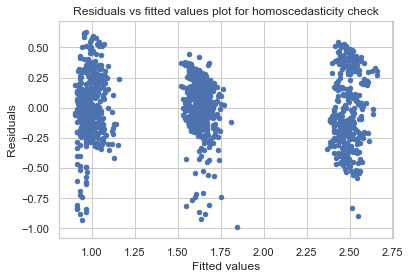

In [44]:
p = df.plot.scatter(x='Fitted_value', y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

 The null hypothesis for Breusch-pagan test is that:

* H0 = variance2i = variance2 (the variances for the errors are equal)


 The alternate hypothesis (the one you are testing), is that:

* H1 = variance2i not equal variance2 (the variance arenot equal)

In [45]:
# Run the Breusch-Pagan test
_, pval2, _, f_pval2 = diag.het_breuschpagan(final_model.resid, final_model.model.exog)
print(pval2, f_pval2)

4.519823786191736e-06 3.880565702600642e-06


## Normality

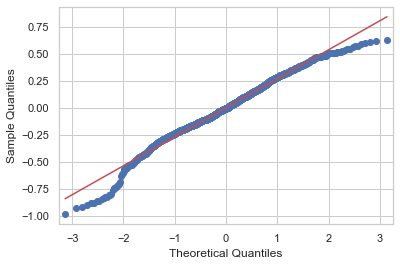

In [46]:
import pylab
# check for the normality of the residuals
sm.qqplot(final_model.resid, line='s')
pylab.show()

In [47]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(final_model.resid)/ len(final_model.resid)
mean_residuals

9.013009537496913e-16

## Model Error are IID

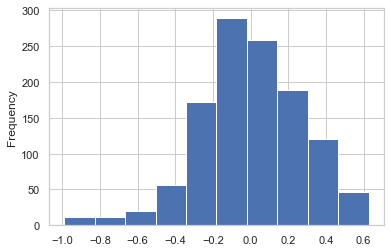

In [48]:
df['Residual'].plot.hist()

## Prediction on Test Data (unseen data)

In [49]:
x_test2 = x_test[['JobRole', 'NumCompaniesWorked', 'YearsOfExperience', 'Communication', 'Certifications']]

In [50]:
x_test2 = sm.add_constant(x_test2)

In [51]:
x_test2.head()

const  JobRole  NumCompaniesWorked  YearsOfExperience  Communication  \
880     1.0        2                   1                2.0              0   
152     1.0        8                   2                5.0              0   
1466    1.0        0                   4                7.0              1   
1084    1.0        7                   1                6.0              1   
1086    1.0        5                   1                9.0              1   

      Certifications  
880                0  
152                1  
1466               1  
1084               1  
1086               1

In [52]:
y_predict = final_model.predict(x_test2)

In [53]:
test = pd.concat([x_test, y_test], axis=1)

In [54]:
test['predicted'] = y_predict

In [55]:
test['Original']=np.exp(test.predicted)*1000

In [56]:
test.head()

Age  Gender  JobRole  EducationField  NumCompaniesWorked  \
880    43       0        2               4                   1   
152    28       1        8               2                   2   
1466   36       1        0               3                   4   
1084   52       1        7               5                   1   
1086   23       1        5               3                   1   

      YearsOfExperience  Communication  Certifications    LN_MI2  predicted  \
880                 2.0              0               0  1.009052   0.989127   
152                 5.0              0               1  0.835514   1.596343   
1466                7.0              1               1  2.301685   2.555976   
1084                6.0              1               1  1.957698   2.446393   
1086                9.0              1               1  2.667992   2.500863   

          Original  
880    2688.885240  
152    4934.953954  
1466  12883.866243  
1084  11546.625379  
1086  12193.012371

In [57]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(df['MonthlyIncome'], df['Original'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("RMSE {:.3}".format(model_rmse))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').